In [63]:
import numpy as np
import pandas as pd


# confusion_matrix = array([
#    [ 45,  29,  18,  14,   5,  23,   3,  18,   0,  16,   3,   2],
#    [ 48, 125,  25,  27,  13,   5,  12,   8,   3,   9,   1,   1],
#    [ 29,  19, 410,  16,   7,   3,   3,   4,   1,  35,   7,   0],
#    [ 11,  18,  14,   2,   2,  10,   2,  17,   1,   5,   2,   3],
#    [  9,  11,   5,   3,   4,   3,   0,  10,   1,   2,   0,   1],
#    [ 18,   9,   6,   5,   0, 120,  16,   0,   0,   0,   0,   0],
#    [  5,  16,   4,   1,   2,  12,   5,   4,   0,   4,   0,   0],
#    [ 28,  27,   4,  26,   5,   1,   1, 185,   1,  18,  22,   3],
#    [  1,   4,   1,   3,   2,   0,   0,   2,   0,   0,   0,   0],
#    [ 22,   6,  18,   7,   8,   0,   3,  20,   0,  97,   6,   1],
#    [  5,   7,   8,  10,   1,   0,   0,  18,   0,   2,  14,   0],
#    [  3,   7,   1,  11,   0,   0,   0,   6,   0,   1,   2,   7]],
# dtype=int64)

train_first = pd.read_pickle("../data/processed/processed_all/train_all_first.pickle")
train_last = pd.read_pickle("../data/processed/processed_all/train_all_last.pickle")

# click_mode is the chosen mode by user out of all suggested tranport modes
click_mode = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

In [64]:
train_first.head()

,sid,click_time,click_mode,pid,req_time,o_long,o_lat,d_long,d_lat,distance_query,...,req_hour,req_weekend,req_night,req_day,req_evening,is_holiday,max_temp,min_temp,weather,wind
0,2848914.0,2018-11-17 18:42:17,1.0,101804.0,2018-11-17 12:56:15,116.36,40.07,116.00,40.35,0.456070,...,12,1,0,1,0,0,9,-2,dyq,12
1,2848913.0,2018-11-17 22:25:29,2.0,101804.0,2018-11-17 22:25:16,116.41,39.92,116.39,39.99,0.072801,...,22,1,0,0,1,0,9,-2,dyq,12
2,2542469.0,2018-11-19 10:30:57,2.0,101804.0,2018-11-19 10:30:50,116.61,40.05,116.41,39.92,0.238537,...,10,0,0,1,0,0,10,-2,qdy,12
3,381188.0,2018-10-05 12:37:07,2.0,101804.0,2018-10-05 12:37:05,116.42,39.88,116.58,40.08,0.256125,...,12,1,0,1,0,1,24,14,dy,12
4,1601376.0,2018-10-03 13:32:30,1.0,101804.0,2018-10-03 13:27:35,116.37,39.95,116.39,39.89,0.063246,...,13,0,0,1,0,1,25,10,q,12


In [65]:
# Counts quantity of mode in list
def click_mode_count(mode):
    target_count = train_first.click_mode.value_counts()
    return target_count[mode]

In [66]:
# Example Count each click_mode
for mode in click_mode:
    result = click_mode_count(mode)
    print(f'Click Mode {mode}:', result)

Click Mode 1: 70369
Click Mode 2: 136491
Click Mode 3: 24626
Click Mode 4: 12606
Click Mode 5: 47480
Click Mode 6: 11863
Click Mode 7: 78209
Click Mode 8: 1857
Click Mode 9: 48864
Click Mode 10: 14882
Click Mode 11: 6089


In [67]:
# Returns excerpt of list by mode 
def divide_mode(mode):
    return train_first[train_first['click_mode'] == mode]

In [68]:
# Example excerpt of list by click_mode 2
df_modelist = divide_mode(2)
df_modelist.click_mode.count()

136491

In [69]:
df_modelist.head()

,sid,click_time,click_mode,pid,req_time,o_long,o_lat,d_long,d_lat,distance_query,...,req_hour,req_weekend,req_night,req_day,req_evening,is_holiday,max_temp,min_temp,weather,wind
1,2848913.0,2018-11-17 22:25:29,2.0,101804.0,2018-11-17 22:25:16,116.41,39.92,116.39,39.99,0.072801,...,22,1,0,0,1,0,9,-2,dyq,12
2,2542469.0,2018-11-19 10:30:57,2.0,101804.0,2018-11-19 10:30:50,116.61,40.05,116.41,39.92,0.238537,...,10,0,0,1,0,0,10,-2,qdy,12
3,381188.0,2018-10-05 12:37:07,2.0,101804.0,2018-10-05 12:37:05,116.42,39.88,116.58,40.08,0.256125,...,12,1,0,1,0,1,24,14,dy,12
6,3064093.0,2018-11-16 13:31:34,2.0,101804.0,2018-11-16 13:30:59,116.41,39.92,116.39,39.91,0.022361,...,13,1,0,1,0,0,8,-1,q,12
7,381189.0,2018-10-05 12:41:08,2.0,101804.0,2018-10-05 12:41:07,116.42,39.88,116.58,40.08,0.256125,...,12,1,0,1,0,1,24,14,dy,12


In [70]:
# Random downsampling to 50%
# .sample() random items of given length
# Returns list of downsampled mode 

def down_half(mode):
    quantity = click_mode_count(mode)
    print('Quantity: ', quantity)
    half = quantity//2
    print('Half: ', half)
    df_modelist = divide_mode(mode)
    
    df_mode_half = df_modelist.sample(half)
    return df_mode_half

In [71]:
# Example downsampling click_mode 2 to half
df_mode2_half = down_half(2)
df_mode2_half.click_mode.count()

Quantity:  136491
Half:  68245


68245

In [72]:
# Random downsampling to quantity of another click_mode
# .sample() random items of given length
# Returns list of downsampled mode 

def down_othermode(mode, target_mode):
    new_quantity = click_mode_count(target_mode)
    df_modelist = divide_mode(mode)
    
    df_mode_target = df_modelist.sample(new_quantity)
    return df_mode_target

In [21]:
# Example downsampling click_mode 2 to minority click_mode 8
df_mode2_mode8 = down_othermode(2, 8)
df_mode2_mode8.click_mode.count()

1857

In [22]:
df_mode2_mode8.groupby('click_mode').count()

,sid,click_time,pid,req_time,o_long,o_lat,d_long,d_lat,distance_query,p0,...,req_hour,req_weekend,req_night,req_day,req_evening,is_holiday,max_temp,min_temp,weather,wind
click_mode,,,,,,,,,,,,,,,,,,,,,
2.0,1857,1857,1324,1857,1857,1857,1857,1857,1857,1324,...,1857,1857,1857,1857,1857,1857,1857,1857,1857,1857


In [73]:
# Random downsampling to input percentage
# .sample() random items of given length
# Returns list of downsampled mode 

def down_percent(mode, percentage):
    perc = percentage*0.01
    quantity = click_mode_count(mode) 
    new_quantity = int(quantity*perc)
    df_modelist = divide_mode(mode)
    
    df_mode_perc = df_modelist.sample(new_quantity)
    return df_mode_perc

In [74]:
# Example downsampling click_mode 2 to 30% (input)
df_mode2_30 = down_percent(2, 30)
df_mode2_30.click_mode.count()

40947

In [75]:
# Returns list without downsampled click_mode
def list_without_down_mode(down_mode):
    list_restmodes = []
    excerpt_mode = down_mode-1
    
    for mode in click_mode [:excerpt_mode]:
        click_mode_list = divide_mode(mode)
        list_restmodes.append(click_mode_list) 
    
    for mode in click_mode [(excerpt_mode+1):]:
        click_mode_list = divide_mode(mode)
        list_restmodes.append(click_mode_list) 
    
    df_restmodes = pd.concat(list_restmodes)
    return df_restmodes

In [76]:
# Example list without downsampled click_mode 2
liste_restmodes = list_without_down_mode(2)
liste_restmodes.click_mode.value_counts()

7.0     78209
1.0     70369
9.0     48864
5.0     47480
3.0     24626
10.0    14882
4.0     12606
6.0     11863
11.0     6089
8.0      1857
Name: click_mode, dtype: int64

In [77]:
# Returns list including downsampled click_mode
# Example downsample click_mode 2 to 50%

df_train_first_downsampled = pd.concat([down_half(2), list_without_down_mode(2)], axis=0)
df_train_first_downsampled.click_mode.value_counts()

Quantity:  136491
Half:  68245


7.0     78209
1.0     70369
2.0     68245
9.0     48864
5.0     47480
3.0     24626
10.0    14882
4.0     12606
6.0     11863
11.0     6089
8.0      1857
Name: click_mode, dtype: int64

In [30]:
df_train_first_downsampled.to_pickle('../data/interim/df_train_downsampled_2.pickle')

In [61]:
def plot_count_mode(df):
    import matplotlib.pyplot as plt
    fig, ax = plt.subplots(figsize=(20,10))
    x = df.click_mode.unique()
    x.sort()
    y = df.groupby('click_mode').count()['sid']
    ax.bar(x, y);
    ax.set_xticklabels(x, fontsize=16);
    ax.set_xticks(x);
    ax.set_yticklabels(range(0,90000,10000), fontsize=16);
    rects = ax.patches

    # Make some labels.
    labels = y

    for rect, label in zip(rects, labels):
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width() / 2, height + 5, '{:.2f}'.format(label),
                ha='center', va='bottom', fontsize=16)

    ax.set_title("Downsampled data", fontsize=16);

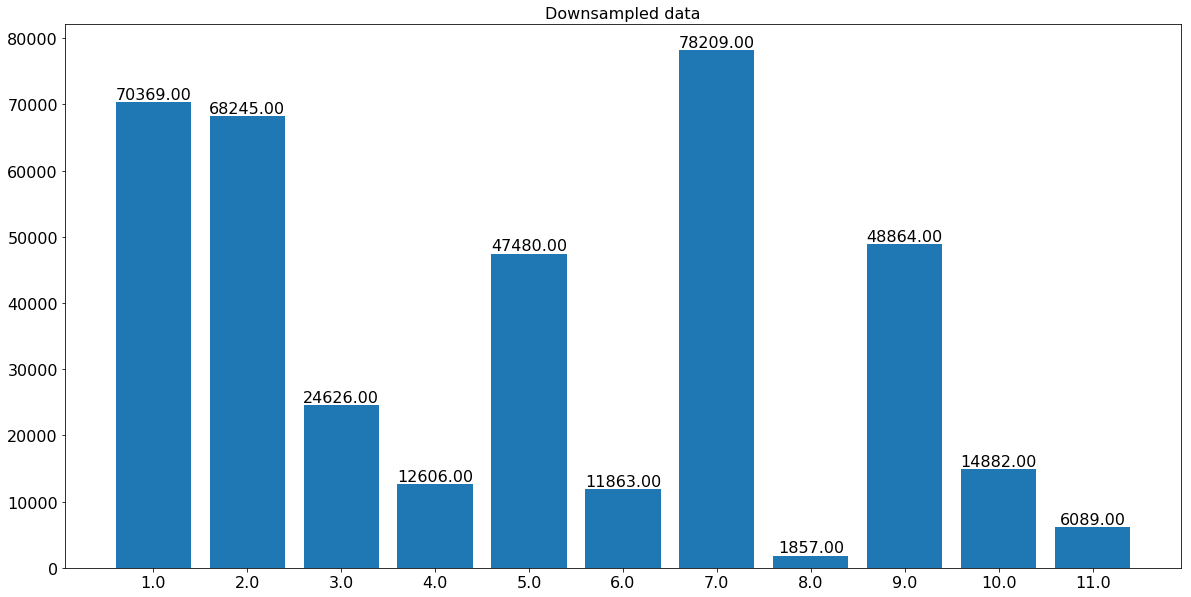

In [78]:
plot_count_mode(df_train_first_downsampled)

In [59]:
# Returns list including downsampled click_mode
# Example downsample click_mode 2 to 30%

df_train_first_downsampled = pd.concat([down_percent(2, 30), list_without_down_mode(2)], axis=0)
df_train_first_downsampled.click_mode.value_counts()

7.0     78209
1.0     70369
9.0     48864
5.0     47480
2.0     40947
3.0     24626
10.0    14882
4.0     12606
6.0     11863
11.0     6089
8.0      1857
Name: click_mode, dtype: int64